# Introduction

Goal: Explore Walmart product and pricing data to understand how discounts, ratings, and pricing relate to product performance.

In this project, I clean raw e-commerce data, perform exploratory analysis, and derive insights about pricing, ratings, and discount strategies.

After cleaning and analysis, I fully visualize my findings in Power BI.

# Setup

In [1]:
import json
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display
# Making it easier to view data
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 50)

In [2]:
WalmartData = pd.read_csv(r'C:\Users\t3and\OneDrive\Documents\Walmart\walmart-products.csv')
WalmartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               1000 non-null   object 
 1   url                     1000 non-null   object 
 2   final_price             1000 non-null   float64
 3   sku                     1000 non-null   int64  
 4   currency                1000 non-null   object 
 5   gtin                    999 non-null    float64
 6   specifications          1000 non-null   object 
 7   image_urls              1000 non-null   object 
 8   top_reviews             1000 non-null   object 
 9   rating_stars            1000 non-null   object 
 10  related_pages           991 non-null    object 
 11  available_for_delivery  1000 non-null   bool   
 12  available_for_pickup    1000 non-null   bool   
 13  brand                   1000 non-null   object 
 14  breadcrumbs             1000 non-null   o

# Data Cleaning

In [3]:
# Create a dataframe copy I can manipulate
df = WalmartData.copy()
df.head()

,timestamp,url,final_price,sku,currency,gtin,specifications,image_urls,top_reviews,rating_stars,related_pages,available_for_delivery,available_for_pickup,brand,breadcrumbs,category_ids,review_count,description,product_id,product_name,review_tags,category_url,category_name,category_path,root_category_url,root_category_name,upc,tags,main_image,rating,unit_price,unit,aisle,free_returns,sizes,colors,seller,other_attributes,customer_reviews,ingredients,initial_price,discount,ingredients_full,categories
0,2024-08-24 00:00:00.000,https://www.walmart.com/ip/Laura-Mercier-Cavia...,22.90,173530386,USD,7.361501e+11,"[{""name"":""Brand"",""value"":""Laura Mercier""},{""na...","[""https://i5.walmartimages.com/seo/Laura-Merci...","{""negative"":{},""positive"":{}}","{""five_stars"":2,""four_stars"":3,""two_stars"":1}","[""https://www.walmart.com/browse/premium-beaut...",True,False,Laura Mercier,"[{""name"":""Beauty"",""url"":""https://www.walmart.c...",0:1085666:1007040:6659232:6297527:7896251,6,Laura Mercier Caviar Stick Eye Color Sugar Fro...,173530386,Laura Mercier Caviar Stick Eye Color Sugar Fro...,[],https://www.walmart.com/browse/beauty/eye-shad...,Eye Shadow Stick,/cp/eye-shadow-stick/7896251,https://www.walmart.com/browse/beauty/1085666,Beauty,7.361501e+11,"[""Reviewers highlighted: ease of use, blending...","""https://i5.walmartimages.com/seo/Laura-Mercie...",4.0,22.9,count,NaN,Free 90-day returns,[],"[""Sugar Frost"",""Tuxedo""]",Wal███t.c███,"[{""name"":""Instructions"",""value"":""Apply directl...","[{""name"":""Jac███"",""rating"":5,""review"":""My only...","Cyclopentasiloxane, trimethylsiloxysilicate, s...",NaN,NaN,"[{""type"":""Ingredients"",""values"":""Cyclopentasil...","[""Beauty"",""Makeup"",""Eye Makeup"",""Eye Shadow"",""..."
1,2024-08-24 00:00:00.000,https://www.walmart.com/ip/Exultantex-Grey-Bla...,47.88,430528189,USD,7.710779e+11,"[{""name"":""Brand"",""value"":""Exultantex""},{""name""...","[""https://i5.walmartimages.com/seo/Exultantex-...","{""negative"":{""rating"":1,""review"":""Color not ac...","{""five_stars"":47,""four_stars"":4,""one_star"":4,""...","[""https://www.walmart.com/browse/home/room-dar...",True,False,Exultantex,"[{""name"":""Home"",""url"":""https://www.walmart.com...",0:4044:133012:539105:1521917:1331481,58,✨Soft triple weave fabric with a velvet-lik...,430528189,Exultantex Grey Blackout Curtains for Living R...,"[""Design (25)"",""Pocket (24)"",""Living Room (24)...",https://www.walmart.com/browse/home/blackout-c...,Blackout Curtains,/cp/blackout-curtains/1331481,https://www.walmart.com/cp/home/4044,Home,7.710779e+11,"[""Reduced price""]","""https://i5.walmartimages.com/seo/Exultantex-G...",4.6,NaN,NaN,NaN,Free 90-day returns,"[""50\"" x 54\"""",""50\"" x 63\"""",""50\"" x 84\"""",""50...","[""Black"",""Blue"",""Green"",""Gray"",""Natural(Ivory)...",Exu███nte███ome███,"[{""name"":""Fabric Care Instructions"",""value"":""M...","[{""name"":""Dana"",""rating"":5,""review"":""I love th...",NaN,70.80,$22.92,NaN,"[""Home"",""Decor"",""Curtains & Window Treatments""..."
2,2024-08-24 00:00:00.000,https://www.walmart.com/ip/Jessica-London-Wome...,33.24,6013308220,USD,4.651920e+11,"[{""name"":""Features"",""value"":""Easy Care""},{""nam...","[""https://i5.walmartimages.com/seo/Jessica-Lon...","{""negative"":{},""positive"":{}}","{""five_stars"":2}","[""https://www.walmart.com/browse/clothing/the-...",True,False,Jessica London,"[{""name"":""Clothing"",""url"":""https://www.walmart...",0:5438:133195:1228775:136318,2,Jessica London Women's Plus Size Stretch Knit ...,6013308220,Jessica London Women's Plus Size Stretch Knit ...,[],https://www.walmart.com/browse/clothing/plus-s...,Plus Size Tops,/cp/plus-size-tops/136318,https://www.walmart.com/cp/clothing/5438,Clothing,4.651920e+11,"[""Reduced price""]","""https://i5.walmartimages.com/seo/Jessica-Lond...",5.0,NaN,NaN,NaN,Free 30-day returns,"[""S"",""M"",""L"",""1X"",""2X"",""3X""]","[""Aqua Sea"",""Dark Olive Green"",""Dark Sapphire""...",Ful███aut███ran███

In [4]:
# Transform the timestamp data into workable date data
df['date'] = pd.to_datetime(df['timestamp'])
df['date'].head()

0   2024-08-24
1   2024-08-24
2   2024-08-24
3   2024-08-24
4   2024-08-25
Name: date, dtype: datetime64[ns]

In [5]:
# Remove the redundant timestamp column
df.drop(['timestamp'], inplace=True, axis=1)
df.shape

(1000, 44)

#### Same number of columns means it worked!

In [6]:
# Missing values check
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent.round(2)
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

                  Missing Count  Missing %
aisle                       950       95.0
unit_price                  899       89.9
unit                        899       89.9
ingredients_full            886       88.6
ingredients                 886       88.6
tags                        213       21.3
other_attributes            123       12.3
initial_price               102       10.2
discount                    102       10.2
free_returns                 25        2.5
related_pages                 9        0.9
description                   1        0.1
gtin                          1        0.1
upc                           1        0.1


#### There are quite a few missing values in several columns.
#### First I need to decide which data I actually want to use in this analysis.

In [7]:
df.head()

,url,final_price,sku,currency,gtin,specifications,image_urls,top_reviews,rating_stars,related_pages,available_for_delivery,available_for_pickup,brand,breadcrumbs,category_ids,review_count,description,product_id,product_name,review_tags,category_url,category_name,category_path,root_category_url,root_category_name,upc,tags,main_image,rating,unit_price,unit,aisle,free_returns,sizes,colors,seller,other_attributes,customer_reviews,ingredients,initial_price,discount,ingredients_full,categories,date
0,https://www.walmart.com/ip/Laura-Mercier-Cavia...,22.90,173530386,USD,7.361501e+11,"[{""name"":""Brand"",""value"":""Laura Mercier""},{""na...","[""https://i5.walmartimages.com/seo/Laura-Merci...","{""negative"":{},""positive"":{}}","{""five_stars"":2,""four_stars"":3,""two_stars"":1}","[""https://www.walmart.com/browse/premium-beaut...",True,False,Laura Mercier,"[{""name"":""Beauty"",""url"":""https://www.walmart.c...",0:1085666:1007040:6659232:6297527:7896251,6,Laura Mercier Caviar Stick Eye Color Sugar Fro...,173530386,Laura Mercier Caviar Stick Eye Color Sugar Fro...,[],https://www.walmart.com/browse/beauty/eye-shad...,Eye Shadow Stick,/cp/eye-shadow-stick/7896251,https://www.walmart.com/browse/beauty/1085666,Beauty,7.361501e+11,"[""Reviewers highlighted: ease of use, blending...","""https://i5.walmartimages.com/seo/Laura-Mercie...",4.0,22.9,count,NaN,Free 90-day returns,[],"[""Sugar Frost"",""Tuxedo""]",Wal███t.c███,"[{""name"":""Instructions"",""value"":""Apply directl...","[{""name"":""Jac███"",""rating"":5,""review"":""My only...","Cyclopentasiloxane, trimethylsiloxysilicate, s...",NaN,NaN,"[{""type"":""Ingredients"",""values"":""Cyclopentasil...","[""Beauty"",""Makeup"",""Eye Makeup"",""Eye Shadow"",""...",2024-08-24
1,https://www.walmart.com/ip/Exultantex-Grey-Bla...,47.88,430528189,USD,7.710779e+11,"[{""name"":""Brand"",""value"":""Exultantex""},{""name""...","[""https://i5.walmartimages.com/seo/Exultantex-...","{""negative"":{""rating"":1,""review"":""Color not ac...","{""five_stars"":47,""four_stars"":4,""one_star"":4,""...","[""https://www.walmart.com/browse/home/room-dar...",True,False,Exultantex,"[{""name"":""Home"",""url"":""https://www.walmart.com...",0:4044:133012:539105:1521917:1331481,58,✨Soft triple weave fabric with a velvet-lik...,430528189,Exultantex Grey Blackout Curtains for Living R...,"[""Design (25)"",""Pocket (24)"",""Living Room (24)...",https://www.walmart.com/browse/home/blackout-c...,Blackout Curtains,/cp/blackout-curtains/1331481,https://www.walmart.com/cp/home/4044,Home,7.710779e+11,"[""Reduced price""]","""https://i5.walmartimages.com/seo/Exultantex-G...",4.6,NaN,NaN,NaN,Free 90-day returns,"[""50\"" x 54\"""",""50\"" x 63\"""",""50\"" x 84\"""",""50...","[""Black"",""Blue"",""Green"",""Gray"",""Natural(Ivory)...",Exu███nte███ome███,"[{""name"":""Fabric Care Instructions"",""value"":""M...","[{""name"":""Dana"",""rating"":5,""review"":""I love th...",NaN,70.80,$22.92,NaN,"[""Home"",""Decor"",""Curtains & Window Treatments""...",2024-08-24
2,https://www.walmart.com/ip/Jessica-London-Wome...,33.24,6013308220,USD,4.651920e+11,"[{""name"":""Features"",""value"":""Easy Care""},{""nam...","[""https://i5.walmartimages.com/seo/Jessica-Lon...","{""negative"":{},""positive"":{}}","{""five_stars"":2}","[""https://www.walmart.com/browse/clothing/the-...",True,False,Jessica London,"[{""name"":""Clothing"",""url"":""https://www.walmart...",0:5438:133195:1228775:136318,2,Jessica London Women's Plus Size Stretch Knit ...,6013308220,Jessica London Women's Plus Size Stretch Knit ...,[],https://www.walmart.com/browse/clothing/plus-s...,Plus Size Tops,/cp/plus-size-tops/136318,https://www.walmart.com/cp/clothing/5438,Clothing,4.651920e+11,"[""Reduced price""]","""https://i5.walmartimages.com/seo/Jessica-Lond...",5.0,NaN,NaN,NaN,Free 30-day returns,"[""S"",""M"",""L"",""1X"",""2X"",""3X""]","[""Aqua Sea"",""Dark Olive Green"",""Dark Sapphire""...",Ful███aut███ran███,"[{""name"":""Fabric Care Instructions"",""value"":""M

#### This is helpful, but I need to check whether currency has different values to see if I can remove it.
#### I'll check for unique values in all the object columns.

In [8]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Object columns ({len(object_cols)}): {object_cols}")

if object_cols:
    for col in object_cols:
        unique_count = df[col].nunique()
        print(f"\n{col}: {unique_count:,} unique values")
        if unique_count <= 20:
            value_counts = df[col].value_counts(dropna=False)
            for value, count in value_counts.items():
                percent = (count / len(df)) * 100
                print(f"  {value}: {count:,} ({percent:.1f}%)")
        elif unique_count > 20:
            print(f"  Showing top 10 (of {unique_count}):")
            top_10 = df[col].value_counts(dropna=False).head(10)
            for value, count in top_10.items():
                percent = (count / len(df)) * 100
                print(f"  {value}: {count:,} ({percent:.1f}%)")

Object columns (32): ['url', 'currency', 'specifications', 'image_urls', 'top_reviews', 'rating_stars', 'related_pages', 'brand', 'breadcrumbs', 'category_ids', 'description', 'product_name', 'review_tags', 'category_url', 'category_name', 'category_path', 'root_category_url', 'root_category_name', 'tags', 'main_image', 'unit', 'aisle', 'free_returns', 'sizes', 'colors', 'seller', 'other_attributes', 'customer_reviews', 'ingredients', 'discount', 'ingredients_full', 'categories']

url: 1,000 unique values
  Showing top 10 (of 1000):
  https://www.walmart.com/ip/Summer-Toddler-Girl-Bow-Elegant-Mesh-Dress-Sleeveless-Cartoon-Dress-2-8-Years/669112285: 1 (0.1%)
  https://www.walmart.com/ip/Laura-Mercier-Caviar-Stick-Eye-Color-Sugar-Frost-1-64g-0-05oz/173530386: 1 (0.1%)
  https://www.walmart.com/ip/Exultantex-Grey-Blackout-Curtains-for-Living-Room-Pom-Pom-Thermal-Window-Curtains-50-W-x-95-L-2-Panels-Rod-Pocket/430528189: 1 (0.1%)
  https://www.walmart.com/ip/Jessica-London-Women-s-Plus-Siz

In [9]:
# Because currency is listed in USD in all sample rows, it can be safely dropped
# Other irrelevant columns are also removed
DroppedColumns = ['url','currency','specifications','image_urls','top_reviews',
                  'related_pages','breadcrumbs','description','review_tags',
                  'category_url','root_category_url','main_image','unit','aisle',
                  'other_attributes','customer_reviews','ingredients','ingredients_full', 'free_returns']
df.drop(DroppedColumns, inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   final_price             1000 non-null   float64       
 1   sku                     1000 non-null   int64         
 2   gtin                    999 non-null    float64       
 3   rating_stars            1000 non-null   object        
 4   available_for_delivery  1000 non-null   bool          
 5   available_for_pickup    1000 non-null   bool          
 6   brand                   1000 non-null   object        
 7   category_ids            1000 non-null   object        
 8   review_count            1000 non-null   int64         
 9   product_id              1000 non-null   int64         
 10  product_name            1000 non-null   object        
 11  category_name           1000 non-null   object        
 12  category_path           1000 non-null   object   

#### I need to double-check my data and make sure everything is the data type that it should be

In [10]:
df.head()

,final_price,sku,gtin,rating_stars,available_for_delivery,available_for_pickup,brand,category_ids,review_count,product_id,product_name,category_name,category_path,root_category_name,upc,tags,rating,unit_price,sizes,colors,seller,initial_price,discount,categories,date
0,22.90,173530386,7.361501e+11,"{""five_stars"":2,""four_stars"":3,""two_stars"":1}",True,False,Laura Mercier,0:1085666:1007040:6659232:6297527:7896251,6,173530386,Laura Mercier Caviar Stick Eye Color Sugar Fro...,Eye Shadow Stick,/cp/eye-shadow-stick/7896251,Beauty,7.361501e+11,"[""Reviewers highlighted: ease of use, blending...",4.0,22.9,[],"[""Sugar Frost"",""Tuxedo""]",Wal███t.c███,NaN,NaN,"[""Beauty"",""Makeup"",""Eye Makeup"",""Eye Shadow"",""...",2024-08-24
1,47.88,430528189,7.710779e+11,"{""five_stars"":47,""four_stars"":4,""one_star"":4,""...",True,False,Exultantex,0:4044:133012:539105:1521917:1331481,58,430528189,Exultantex Grey Blackout Curtains for Living R...,Blackout Curtains,/cp/blackout-curtains/1331481,Home,7.710779e+11,"[""Reduced price""]",4.6,NaN,"[""50\"" x 54\"""",""50\"" x 63\"""",""50\"" x 84\"""",""50...","[""Black"",""Blue"",""Green"",""Gray"",""Natural(Ivory)...",Exu███nte███ome███,70.80,$22.92,"[""Home"",""Decor"",""Curtains & Window Treatments""...",2024-08-24
2,33.24,6013308220,4.651920e+11,"{""five_stars"":2}",True,False,Jessica London,0:5438:133195:1228775:136318,2,6013308220,Jessica London Women's Plus Size Stretch Knit ...,Plus Size Tops,/cp/plus-size-tops/136318,Clothing,4.651920e+11,"[""Reduced price""]",5.0,NaN,"[""S"",""M"",""L"",""1X"",""2X"",""3X""]","[""Aqua Sea"",""Dark Olive Green"",""Dark Sapphire""...",Ful███aut███ran███,37.99,$4.75,"[""Clothing"",""Womens Plus"",""Plus Size Tops"",""Pl...",2024-08-24
3,49.99,161657830,8.407081e+11,"{""five_stars"":78,""four_stars"":17,""one_star"":2,...",True,False,Simply Put,0:4044:539103:5845895:4531543,101,161657830,100% Cotton King Percale Duvet Set (3 Piece) B...,King Duvet Covers,/cp/king-duvet-covers/4531543,Home,8.407081e+11,"[""Reduced price""]",4.7,NaN,"[""Queen"",""King""]","[""Beige"",""Blue"",""Gray"",""Spa Blue""]",IC ███bal███c,71.99,$22.00,"[""Home"",""Bedding"",""Duvet Covers"",""King Duvet C...",2024-08-24
4,12.99,5397071399,4.600086e+11,"{""five_stars"":12,""one_star"":1,""three_stars"":1,...",True,False,Disney,0:5438:7712430:7809949:8960515,15,5397071399,Disney Boys Graphic Tee Donald Duck Short Slee...,Boys Outfit Sets,/cp/boys-outfit-sets/8960515,Clothing,4.600086e+11,"[""Best seller"",""Clearance""]",4.4,NaN,"[""2T"",""3T"",""3T-4T"",""3-4 Years"",""4-5 Years"",""4-...","[""1#Yellow Micky"",""2#Pink Minnie"",""3#Blue Dona...",Pat███,29.00,$16.01,"[""Clothing"",""Kids Clothing"",""Boys Clothing"",""B...",2024-08-25


### I notice: 
-  rating_stars is kept as a single text-based object, making it hard to analyze
    
-  category_ids is an object that registers as non-numerical, probably due to the colons
    
-  This is fine since they are unique identifiers and not really numerical data
  
-  I still have multiple identifier columns, such as product_id, gtin, sku, and upc
    
-  final_price is initial_price - discount 
    
-  categories contains several categories for each product, listed in descending primacy
    
-  discount is an object because it has dollar signs

In [11]:
# I will remove the irrelevant columns
MoreDroppedColumns = ['gtin','category_ids','sku','category_path','upc']
df.drop(MoreDroppedColumns, inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   final_price             1000 non-null   float64       
 1   rating_stars            1000 non-null   object        
 2   available_for_delivery  1000 non-null   bool          
 3   available_for_pickup    1000 non-null   bool          
 4   brand                   1000 non-null   object        
 5   review_count            1000 non-null   int64         
 6   product_id              1000 non-null   int64         
 7   product_name            1000 non-null   object        
 8   category_name           1000 non-null   object        
 9   root_category_name      1000 non-null   object        
 10  tags                    787 non-null    object        
 11  rating                  1000 non-null   float64       
 12  unit_price              101 non-null    float64  

In [12]:
# Transforming discount into numerical data
df['discount_numeric'] = df['discount'].str.replace('$', '').astype(float)

# Assumption: Missing initial prices indicate the product was sold at full price
df['initial_price'] = df['initial_price'].fillna(df['final_price'])

# I saw the first case had a missing initial price value when using head() before so I can check it again now
df.head()

,final_price,rating_stars,available_for_delivery,available_for_pickup,brand,review_count,product_id,product_name,category_name,root_category_name,tags,rating,unit_price,sizes,colors,seller,initial_price,discount,categories,date,discount_numeric
0,22.90,"{""five_stars"":2,""four_stars"":3,""two_stars"":1}",True,False,Laura Mercier,6,173530386,Laura Mercier Caviar Stick Eye Color Sugar Fro...,Eye Shadow Stick,Beauty,"[""Reviewers highlighted: ease of use, blending...",4.0,22.9,[],"[""Sugar Frost"",""Tuxedo""]",Wal███t.c███,22.90,NaN,"[""Beauty"",""Makeup"",""Eye Makeup"",""Eye Shadow"",""...",2024-08-24,NaN
1,47.88,"{""five_stars"":47,""four_stars"":4,""one_star"":4,""...",True,False,Exultantex,58,430528189,Exultantex Grey Blackout Curtains for Living R...,Blackout Curtains,Home,"[""Reduced price""]",4.6,NaN,"[""50\"" x 54\"""",""50\"" x 63\"""",""50\"" x 84\"""",""50...","[""Black"",""Blue"",""Green"",""Gray"",""Natural(Ivory)...",Exu███nte███ome███,70.80,$22.92,"[""Home"",""Decor"",""Curtains & Window Treatments""...",2024-08-24,22.92
2,33.24,"{""five_stars"":2}",True,False,Jessica London,2,6013308220,Jessica London Women's Plus Size Stretch Knit ...,Plus Size Tops,Clothing,"[""Reduced price""]",5.0,NaN,"[""S"",""M"",""L"",""1X"",""2X"",""3X""]","[""Aqua Sea"",""Dark Olive Green"",""Dark Sapphire""...",Ful███aut███ran███,37.99,$4.75,"[""Clothing"",""Womens Plus"",""Plus Size Tops"",""Pl...",2024-08-24,4.75
3,49.99,"{""five_stars"":78,""four_stars"":17,""one_star"":2,...",True,False,Simply Put,101,161657830,100% Cotton King Percale Duvet Set (3 Piece) B...,King Duvet Covers,Home,"[""Reduced price""]",4.7,NaN,"[""Queen"",""King""]","[""Beige"",""Blue"",""Gray"",""Spa Blue""]",IC ███bal███c,71.99,$22.00,"[""Home"",""Bedding"",""Duvet Covers"",""King Duvet C...",2024-08-24,22.00
4,12.99,"{""five_stars"":12,""one_star"":1,""three_stars"":1,...",True,False,Disney,15,5397071399,Disney Boys Graphic Tee Donald Duck Short Slee...,Boys Outfit Sets,Clothing,"[""Best seller"",""Clearance""]",4.4,NaN,"[""2T"",""3T"",""3T-4T"",""3-4 Years"",""4-5 Years"",""4-...","[""1#Yellow Micky"",""2#Pink Minnie"",""3#Blue Dona...",Pat███,29.00,$16.01,"[""Clothing"",""Kids Clothing"",""Boys Clothing"",""B...",2024-08-25,16.01


### Success!

In [13]:
# Make sure discount has proper 0 values instead of missing values
df['discount_numeric'] = df['discount_numeric'].fillna(0)
print(df['discount_numeric'].isna().sum())

0


In [14]:
# Drop the redundant "discount" category
df.drop('discount', inplace=True, axis=1)

In [15]:
# I want to create a new discount column which tells me the percentage rather than the raw number
df['discount_percent'] = round((df['initial_price'] - df['final_price']) / df['initial_price'] * 100, 2)
df.head()

,final_price,rating_stars,available_for_delivery,available_for_pickup,brand,review_count,product_id,product_name,category_name,root_category_name,tags,rating,unit_price,sizes,colors,seller,initial_price,categories,date,discount_numeric,discount_percent
0,22.90,"{""five_stars"":2,""four_stars"":3,""two_stars"":1}",True,False,Laura Mercier,6,173530386,Laura Mercier Caviar Stick Eye Color Sugar Fro...,Eye Shadow Stick,Beauty,"[""Reviewers highlighted: ease of use, blending...",4.0,22.9,[],"[""Sugar Frost"",""Tuxedo""]",Wal███t.c███,22.90,"[""Beauty"",""Makeup"",""Eye Makeup"",""Eye Shadow"",""...",2024-08-24,0.00,0.00
1,47.88,"{""five_stars"":47,""four_stars"":4,""one_star"":4,""...",True,False,Exultantex,58,430528189,Exultantex Grey Blackout Curtains for Living R...,Blackout Curtains,Home,"[""Reduced price""]",4.6,NaN,"[""50\"" x 54\"""",""50\"" x 63\"""",""50\"" x 84\"""",""50...","[""Black"",""Blue"",""Green"",""Gray"",""Natural(Ivory)...",Exu███nte███ome███,70.80,"[""Home"",""Decor"",""Curtains & Window Treatments""...",2024-08-24,22.92,32.37
2,33.24,"{""five_stars"":2}",True,False,Jessica London,2,6013308220,Jessica London Women's Plus Size Stretch Knit ...,Plus Size Tops,Clothing,"[""Reduced price""]",5.0,NaN,"[""S"",""M"",""L"",""1X"",""2X"",""3X""]","[""Aqua Sea"",""Dark Olive Green"",""Dark Sapphire""...",Ful███aut███ran███,37.99,"[""Clothing"",""Womens Plus"",""Plus Size Tops"",""Pl...",2024-08-24,4.75,12.50
3,49.99,"{""five_stars"":78,""four_stars"":17,""one_star"":2,...",True,False,Simply Put,101,161657830,100% Cotton King Percale Duvet Set (3 Piece) B...,King Duvet Covers,Home,"[""Reduced price""]",4.7,NaN,"[""Queen"",""King""]","[""Beige"",""Blue"",""Gray"",""Spa Blue""]",IC ███bal███c,71.99,"[""Home"",""Bedding"",""Duvet Covers"",""King Duvet C...",2024-08-24,22.00,30.56
4,12.99,"{""five_stars"":12,""one_star"":1,""three_stars"":1,...",True,False,Disney,15,5397071399,Disney Boys Graphic Tee Donald Duck Short Slee...,Boys Outfit Sets,Clothing,"[""Best seller"",""Clearance""]",4.4,NaN,"[""2T"",""3T"",""3T-4T"",""3-4 Years"",""4-5 Years"",""4-...","[""1#Yellow Micky"",""2#Pink Minnie"",""3#Blue Dona...",Pat███,29.00,"[""Clothing"",""Kids Clothing"",""Boys Clothing"",""B...",2024-08-25,16.01,55.21


In [16]:
# The rating_stars column looks like a dictionary but I should check to be sure
# Then I can transform it into 5 star columns for ease of analysis

# Try to convert strings to dictionaries
def parse_ratings(rating_str):
    if isinstance(rating_str, str):
        try:
            return json.loads(rating_str)
        except:
            try:
                return ast.literal_eval(rating_str)
            except:
                return {}
    return rating_str if isinstance(rating_str, dict) else {}

# Apply the parsing
df['rating_dict'] = df['rating_stars'].apply(parse_ratings)

# Create separate columns for each star rating
for stars in ['one_star', 'two_stars', 'three_stars', 'four_stars', 'five_stars']:
    df[stars] = df['rating_dict'].apply(lambda x: x.get(stars, 0))

# Drop the unnecessary columns
df.drop(['rating_dict', 'rating_stars'], axis=1, inplace=True)

In [17]:
# Check the data to make sure it worked
df.head()

,final_price,available_for_delivery,available_for_pickup,brand,review_count,product_id,product_name,category_name,root_category_name,tags,rating,unit_price,sizes,colors,seller,initial_price,categories,date,discount_numeric,discount_percent,one_star,two_stars,three_stars,four_stars,five_stars
0,22.90,True,False,Laura Mercier,6,173530386,Laura Mercier Caviar Stick Eye Color Sugar Fro...,Eye Shadow Stick,Beauty,"[""Reviewers highlighted: ease of use, blending...",4.0,22.9,[],"[""Sugar Frost"",""Tuxedo""]",Wal███t.c███,22.90,"[""Beauty"",""Makeup"",""Eye Makeup"",""Eye Shadow"",""...",2024-08-24,0.00,0.00,0,1,0,3,2
1,47.88,True,False,Exultantex,58,430528189,Exultantex Grey Blackout Curtains for Living R...,Blackout Curtains,Home,"[""Reduced price""]",4.6,NaN,"[""50\"" x 54\"""",""50\"" x 63\"""",""50\"" x 84\"""",""50...","[""Black"",""Blue"",""Green"",""Gray"",""Natural(Ivory)...",Exu███nte███ome███,70.80,"[""Home"",""Decor"",""Curtains & Window Treatments""...",2024-08-24,22.92,32.37,4,0,3,4,47
2,33.24,True,False,Jessica London,2,6013308220,Jessica London Women's Plus Size Stretch Knit ...,Plus Size Tops,Clothing,"[""Reduced price""]",5.0,NaN,"[""S"",""M"",""L"",""1X"",""2X"",""3X""]","[""Aqua Sea"",""Dark Olive Green"",""Dark Sapphire""...",Ful███aut███ran███,37.99,"[""Clothing"",""Womens Plus"",""Plus Size Tops"",""Pl...",2024-08-24,4.75,12.50,0,0,0,0,2
3,49.99,True,False,Simply Put,101,161657830,100% Cotton King Percale Duvet Set (3 Piece) B...,King Duvet Covers,Home,"[""Reduced price""]",4.7,NaN,"[""Queen"",""King""]","[""Beige"",""Blue"",""Gray"",""Spa Blue""]",IC ███bal███c,71.99,"[""Home"",""Bedding"",""Duvet Covers"",""King Duvet C...",2024-08-24,22.00,30.56,2,1,3,17,78
4,12.99,True,False,Disney,15,5397071399,Disney Boys Graphic Tee Donald Duck Short Slee...,Boys Outfit Sets,Clothing,"[""Best seller"",""Clearance""]",4.4,NaN,"[""2T"",""3T"",""3T-4T"",""3-4 Years"",""4-5 Years"",""4-...","[""1#Yellow Micky"",""2#Pink Minnie"",""3#Blue Dona...",Pat███,29.00,"[""Clothing"",""Kids Clothing"",""Boys Clothing"",""B...",2024-08-25,16.01,55.21,1,1,1,0,12


In [18]:
# Review numerical data for zeros, negative values, and missing values
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# I don't want to include irrelevant columns with numbers so I removed product_id
numerical_cols.remove('product_id')

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

table_data = []
for col in numerical_cols:
    zeros = (df[col] == 0).sum()
    zeros_pct = zeros / len(df) * 100
    negative = (df[col] < 0).sum() if (df[col] < 0).any() else 0
    missing = df[col].isna().sum()
    missing_pct = missing / len(df) * 100
    
    table_data.append([
        col,
        f"{zeros:,}",
        f"{zeros_pct:.1f}%",
        f"{negative:,}",
        f"{missing:,}",
        f"{missing_pct:.1f}%"
    ])

# Print table
headers = ["Column", "Zero Values", "Zero %", "Negative Values", "Missing Values", "Missing %"]
print(tabulate(table_data, headers=headers, tablefmt="grid", stralign="right"))

Numerical columns (12): ['final_price', 'review_count', 'rating', 'unit_price', 'initial_price', 'discount_numeric', 'discount_percent', 'one_star', 'two_stars', 'three_stars', 'four_stars', 'five_stars']
+------------------+---------------+----------+-------------------+------------------+-------------+
|           Column |   Zero Values |   Zero % |   Negative Values |   Missing Values |   Missing % |
+==================+===============+==========+===================+==================+=============+
|      final_price |             0 |     0.0% |                 0 |                0 |        0.0% |
+------------------+---------------+----------+-------------------+------------------+-------------+
|     review_count |             0 |     0.0% |                 0 |                0 |        0.0% |
+------------------+---------------+----------+-------------------+------------------+-------------+
|           rating |             0 |     0.0% |                 0 |                0 |  

### This confirms that our numeric data is in good workable condition with no unexpected values.
### Time to begin statistical analysis.

# Exploratory Data Analysis

In [19]:
styled_stats = df[numerical_cols].describe().T.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#dcdcdc'), ('font-weight', 'bold')]}
])
display(styled_stats)

,count,mean,std,min,25%,50%,75%,max
final_price,1000.000000,37.986340,97.480940,0.910000,13.960000,19.990000,35.970000,1685.990000
review_count,1000.000000,465.027000,2049.842999,1.000000,9.000000,47.000000,206.500000,43691.000000
rating,1000.000000,4.338800,0.703825,1.000000,4.200000,4.500000,4.700000,5.000000
unit_price,101.000000,12.234287,30.482208,0.083000,0.624000,1.810000,10.500000,199.250000
initial_price,1000.000000,57.170520,157.448551,1.240000,17.990000,30.990000,52.197500,2629.990000
discount_numeric,1000.000000,19.184180,64.156197,0.000000,3.000000,6.750000,15.000000,958.000000
discount_percent,1000.000000,25.441270,18.701114,0.000000,11.570000,20.010000,35.682500,83.860000
one_star,1000.000000,30.490000,153.568790,0.000000,0.000000,2.000000,12.000000,2939.000000
two_stars,1000.000000,13.743000,54.721197,0.000000,0.000000,1.000000,6.000000,1013.000000
three_stars,1000.000000,24.238000,92.381306,0.000000,0.000000,2.000000,11.000000,1854.000000


## Core Business Questions

In [20]:
print("Core Data Insights:")
print(f"Average product price: ${df['final_price'].mean():.2f}")
print(f"Average discount: {df['discount_percent'].mean():.2f}%")
print(f"Average rating: {df['rating'].mean():.2f}/5.0")
print(f"Products with high ratings (≥4.5): {(df['rating'] >= 4.5).mean() * 100:.2f}%")
print(f"Products with low ratings (≤2.5): {(df['rating'] <= 2.5).mean() * 100:.2f}%")

Core Data Insights:
Average product price: $37.99
Average discount: 25.44%
Average rating: 4.34/5.0
Products with high ratings (≥4.5): 53.50%
Products with low ratings (≤2.5): 2.90%


### What are the most common product categories?

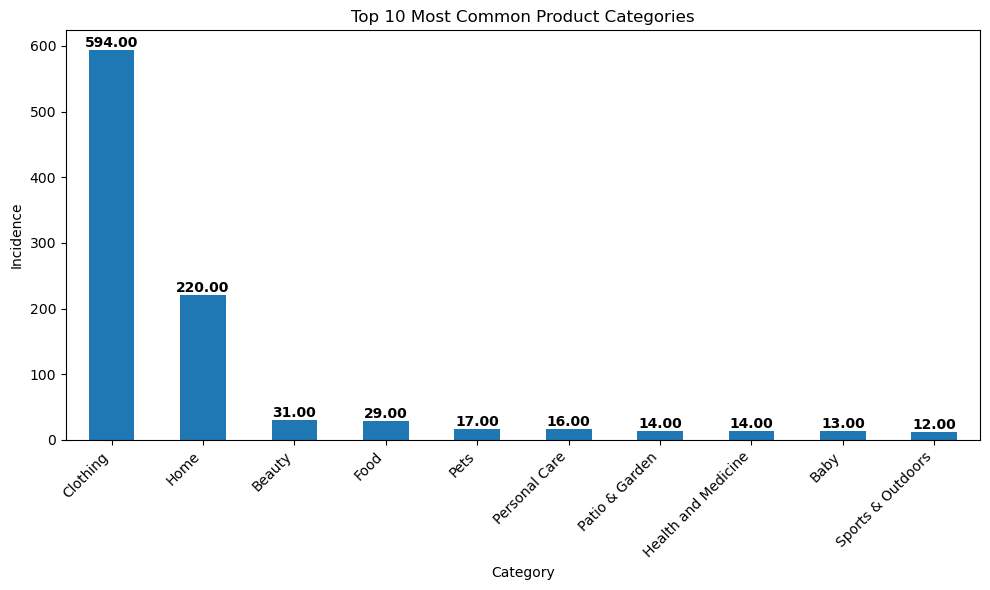

In [21]:
top_categories = df['root_category_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
ax = top_categories.plot(kind='bar')
plt.title('Top 10 Most Common Product Categories')
plt.xlabel('Category')
plt.ylabel('Incidence')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_categories):
    ax.text(i, v + 0.05,
            f'{v:.2f}',
            ha='center',
            va='bottom',
            fontweight='bold')
plt.tight_layout()
plt.show()

#### Clothing dominates our dataset, followed by Home. All other categories have fewer than 32 items.

### What do the product ratings look like?

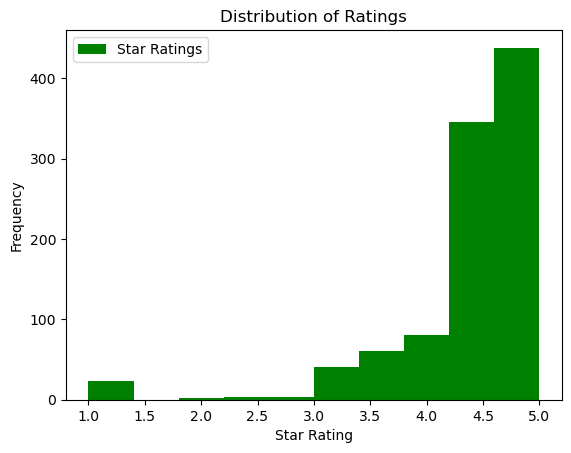

In [22]:
plt.hist('rating', bins=10, range=None, histtype='bar', align='mid',
         orientation='vertical', color='g', label='Star Ratings', 
         stacked=False, data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.legend()

### Our rating data is leftward skewed with a glut of 1 star ratings and a main tendency toward 5 star reviews, dropping off at each tier below.

In [23]:
df.sort_values('review_count', ascending=False)[['product_name', 'review_count', 'rating', 'final_price', 'category_name']].head(10)

,product_name,review_count,rating,final_price,category_name
149,"Parent's Choice Dry & Gentle Diapers Size 4, 1...",43691,4.5,27.38,Size 4 Diapers
916,Yankee Candle Pink Sands Original Large Scente...,23856,4.6,16.88,Scented Candles
187,Crocs Unisex Baya Clog Sandals,21495,4.7,44.99,Water Shoes
530,Clara Clark Full Size Deep Pocket 4 Piece Bed ...,13108,4.6,31.49,Sheet Sets
85,Clara Clark Twin Size Deep Pocket 3 Piece Bed ...,13105,4.6,22.96,Sheet Sets
379,"(3 pack) Garnier Nutrisse Ultra Color, R24 Int...",12718,4.0,10.50,Red Hair Dye
202,(2 pack) L'Oreal Paris Feria Permanent Hair Co...,11308,3.8,19.94,Conditioning Hair Color
197,(3 pack) Garnier Nutrisse Nourishing Hair Colo...,8290,4.2,25.41,Garnier Hair Care
401,Playtex 18 Hour Comfort Strap Bra,6950,4.3,25.35,Womens Bras
482,"Mainstays Blackout Curtain Panel Pair, Set of ...",6728,4.4,9.94,Shop Curtains


#### These products are the most reviewed in the dataset. They tend to be highly rated and come from many different categories.

### Out of the top 10 most common brands, which are the ***best rated?***

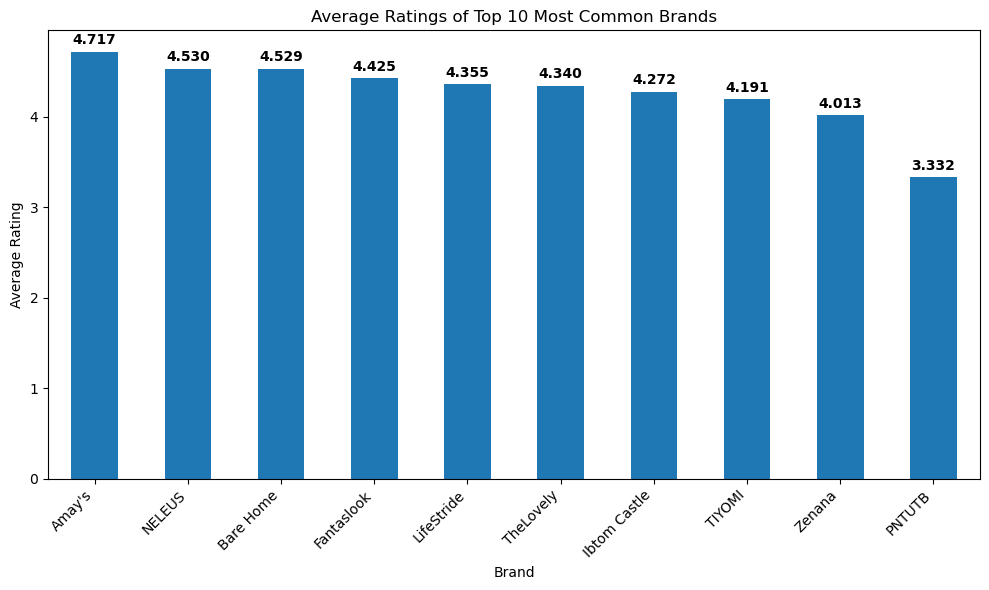

In [24]:
# Step 1: Find the 10 most common brands
top_10_brands = df['brand'].value_counts().nlargest(10).index.tolist()
# Step 2: Filter the dataframe to only include rows with these top 10 brands
filtered_df = df[df['brand'].isin(top_10_brands)]
# Step 3: Calculate the average rating for each of these brands
brand_ratings = filtered_df.groupby('brand')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = brand_ratings.plot(kind='bar')
plt.title('Average Ratings of Top 10 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
# Step 4: Add the actual ratings for each brand
for i, v in enumerate(brand_ratings):
    ax.text(i, v + 0.05,
            f'{v:.3f}',
            ha='center',
            va='bottom',
            fontweight='bold')
plt.tight_layout()
plt.show()

#### Our best rated brand from the 10 best sellers is *Amay's*.
#### There is a large dropoff into the 10th highest brand, *PNTUTB*.

### Does the discount affect ratings?

In [25]:
print("Discount correlation with review score")
print(f"Average discount percentage: {df['discount_percent'].mean():.2f}%")
print(f"Correlation between discount_percent and rating: {df['discount_percent'].corr(df['rating']):.3f}")

Discount correlation with review score
Average discount percentage: 25.44%
Correlation between discount_percent and rating: 0.053


#### According to our sample data, there is a very small positive correlation between discount percentage and star rating. 
#### However, I want to dive deeper into several potential correlatives.

# Statistical Testing

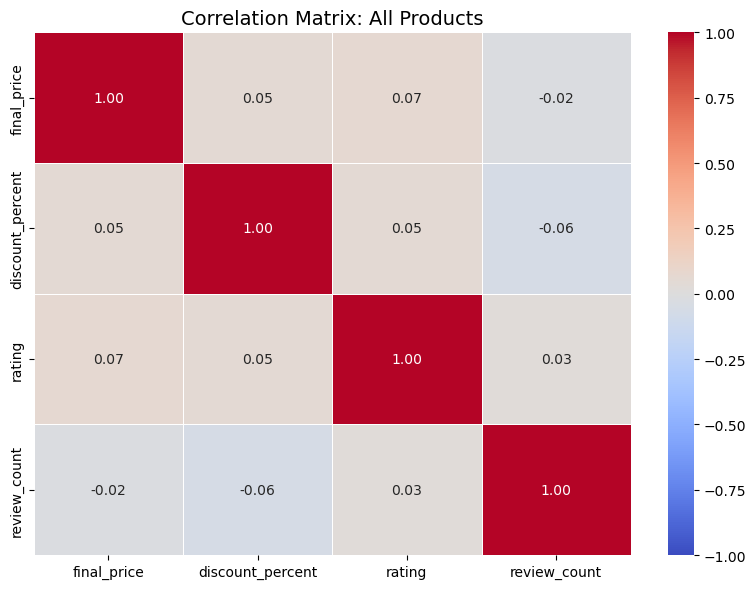

Generating heatmaps for top categories: ['Clothing', 'Home', 'Beauty', 'Food']


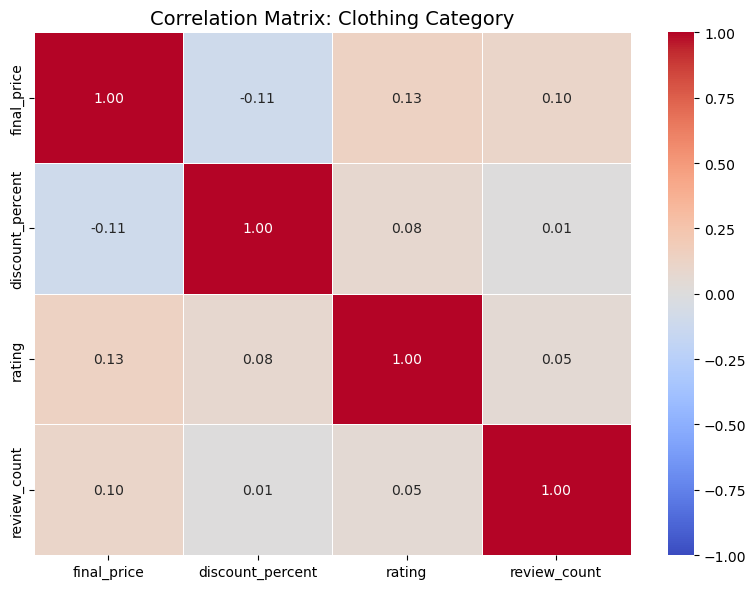

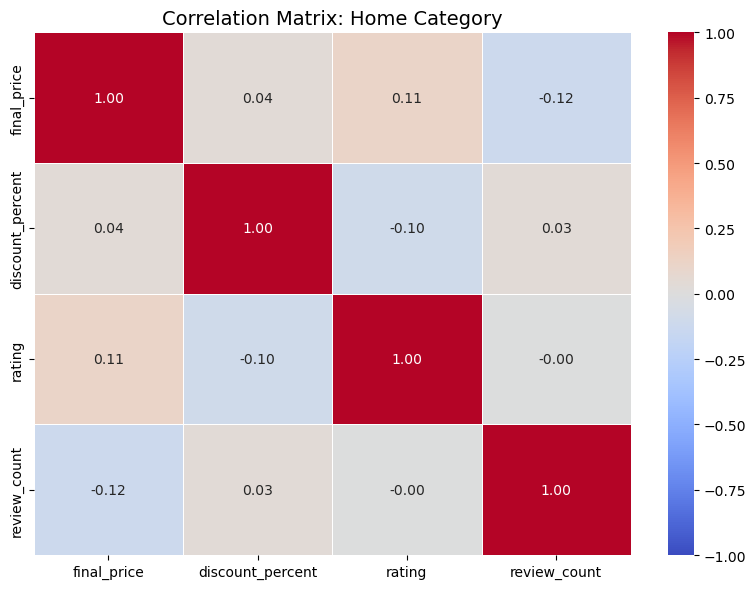

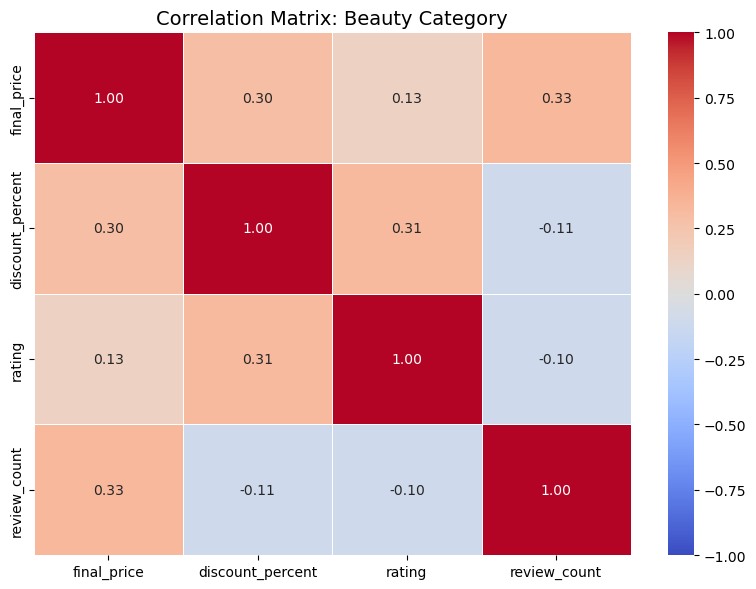

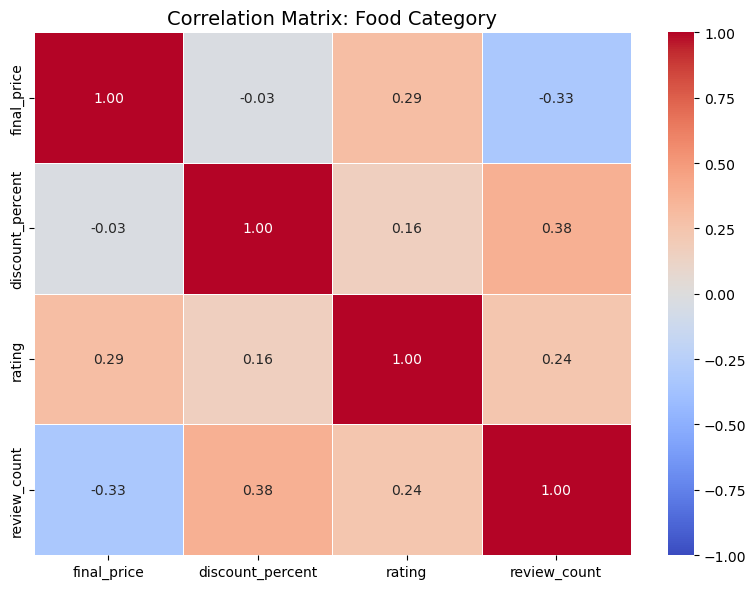

In [26]:
# Define the numerical columns we want to analyze
corr_cols = ['final_price', 'discount_percent', 'rating', 'review_count']

# Define a helper function to keep the code clean
def plot_correlation_heatmap(data, title):
    plt.figure(figsize=(8, 6))
    corr_matrix = data[corr_cols].corr()
    sns.heatmap(corr_matrix, 
                annot=True,
                cmap='coolwarm',
                vmin=-1, vmax=1,
                fmt='.2f',
                linewidths=0.5)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Global Correlation (All Products)
plot_correlation_heatmap(df, 'Correlation Matrix: All Products')

# Correlation by Category (Segmentation)
top_categories = df['root_category_name'].value_counts().head(4).index.tolist()

print(f"Generating heatmaps for top categories: {top_categories}")

for category in top_categories:
    # Filter the dataframe for only this category
    category_df = df[df['root_category_name'] == category]
    
    # Plot the heatmap for this specific slice of data
    plot_correlation_heatmap(category_df, f'Correlation Matrix: {category} Category')

### Correlation Findings:
-  In general, product category plays a strong role in determining how customers interact with ratings.
-  People are more likely to review more expensive clothing and beauty items, but less likely to review more expensive home goods and foods.
-  A high discount% plays the strongest role in determining both rating frequency and score in the food category.
-  Although discount% makes people rate beauty products better, it also makes them less likely to actually rate the product.
-  A higher review count tends to drive the overall score down on beauty products, but up on food products.
-  Higher price correlates with most positive ratings across all categories.

## Availability analysis

In [34]:
delivery_pct = df['available_for_delivery'].mean() * 100
pickup_pct = df['available_for_pickup'].mean() * 100
print(f"Products available for delivery: {delivery_pct:.2f}%")
print(f"Products available for pickup: {pickup_pct:.2f}%")

Products available for delivery: 97.70%
Products available for pickup: 4.80%


## ANOVA Modeling: Compare ratings across top categories

In [28]:
print("\nANOVA: Rating comparison across categories")
top_5_categories = df['root_category_name'].value_counts().head(5).index
category_subset = df[df['root_category_name'].isin(top_5_categories)]
model = ols('rating ~ root_category_name', data=category_subset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


ANOVA: Rating comparison across categories
                        sum_sq     df         F        PR(>F)
root_category_name   16.009749    4.0  9.056674  3.588419e-07
Residual            391.552069  886.0       NaN           NaN


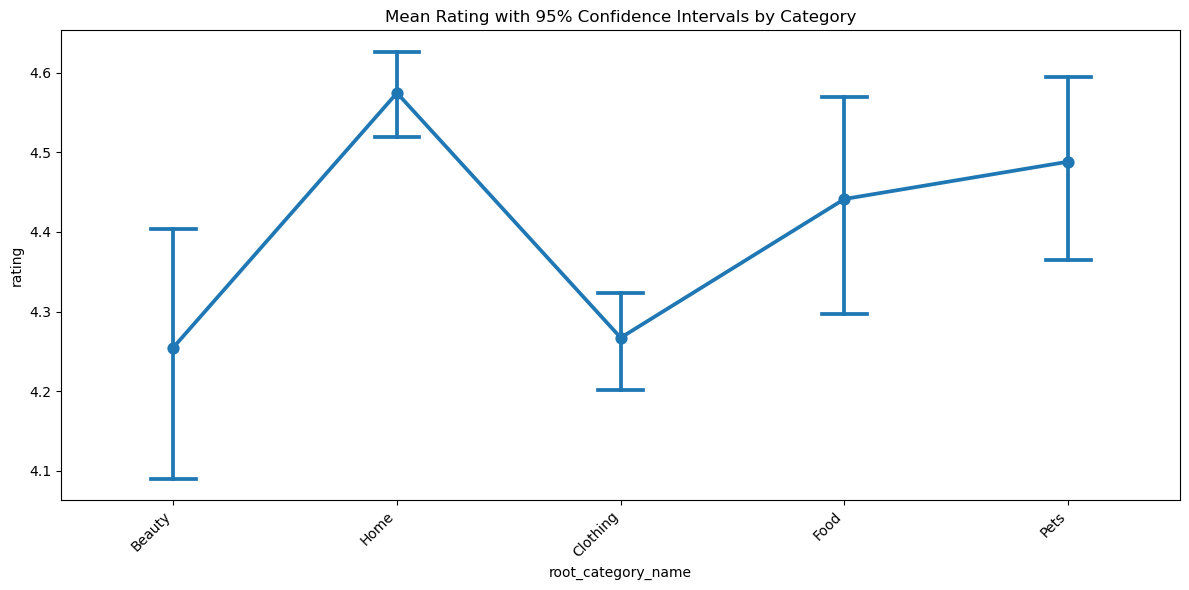

In [29]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='root_category_name', y='rating', data=category_subset, 
              capsize=0.2, errorbar=('ci', 95))
plt.xticks(rotation=45, ha='right')
plt.title('Mean Rating with 95% Confidence Intervals by Category')
plt.tight_layout()
plt.show()

### With a p-value below 0.05, I reject the null hypothesis that there is no difference in rating between product categories.
### Charting the average rating of each category shows that home goods drive high ratings, and beauty and clothing ratings tend to be lower.

In [30]:
# Optimize the data for Power BI
def optimize_dtypes(df):
    dtype_map = {
        'int64': 'int32',
        'float64': 'float32',
        'object': 'category'
    }
    
    for col in df.columns:
        if df[col].dtype == 'object':
            unique_count = df[col].nunique()
            if unique_count < len(df) * 0.5:
                df[col] = df[col].astype('category')
        elif df[col].dtype == 'int64':
            if df[col].max() < 2**31-1: # Avoid negative integer overflow for product_id column
                df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

pb_df = df.copy()
pb_df = optimize_dtypes(pb_df)

# Save to csv
pb_df.to_csv('walmart_powerbi_ready.csv', index=False) # gzip compression was removed due to corruption issues
print(f"Power BI dataset saved with {len(pb_df)} rows and {len(pb_df.columns)} columns")

Power BI dataset saved with 1000 rows and 25 columns


In [31]:
pb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   final_price             1000 non-null   float32       
 1   available_for_delivery  1000 non-null   bool          
 2   available_for_pickup    1000 non-null   bool          
 3   brand                   1000 non-null   object        
 4   review_count            1000 non-null   int32         
 5   product_id              1000 non-null   int64         
 6   product_name            1000 non-null   object        
 7   category_name           1000 non-null   category      
 8   root_category_name      1000 non-null   category      
 9   tags                    787 non-null    category      
 10  rating                  1000 non-null   float32       
 11  unit_price              101 non-null    float32       
 12  sizes                   1000 non-null   category 

# Conclusion

In this project, I cleaned and explored Walmart product and pricing data to better understand how pricing, discounts, and ratings relate to product performance. I undertook significant cleaning, including handling missing values, converting currency-formatted text into numeric fields, and transforming data into usable columns.

I was able to isolate the most popular products in terms of number of ratings as well as the most highly rated brands from among the top 10 most common in the dataset. The best performing brand is Amay's. Although there was very little correlation found between discount and rating, product segmentation revealed that the category of product plays a leading role in determining how customers interact with ratings, including the affect of discount and pricing on ratings.

Walmart could use this type of analysis to better understand how product ratings are impacted by discounting, brand identity, and product category.

I will continue the project by visualizing the data in Power BI.